import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import os

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import os

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.info()
#test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
test.count()

Id               1459
MSSubClass       1459
MSZoning         1455
LotFrontage      1232
LotArea          1459
Street           1459
Alley             107
LotShape         1459
LandContour      1459
Utilities        1457
LotConfig        1459
LandSlope        1459
Neighborhood     1459
Condition1       1459
Condition2       1459
BldgType         1459
HouseStyle       1459
OverallQual      1459
OverallCond      1459
YearBuilt        1459
YearRemodAdd     1459
RoofStyle        1459
RoofMatl         1459
Exterior1st      1458
Exterior2nd      1458
MasVnrType       1443
MasVnrArea       1444
ExterQual        1459
ExterCond        1459
Foundation       1459
                 ... 
HalfBath         1459
BedroomAbvGr     1459
KitchenAbvGr     1459
KitchenQual      1458
TotRmsAbvGrd     1459
Functional       1457
Fireplaces       1459
FireplaceQu       729
GarageType       1383
GarageYrBlt      1381
GarageFinish     1381
GarageCars       1458
GarageArea       1458
GarageQual       1381
GarageCond

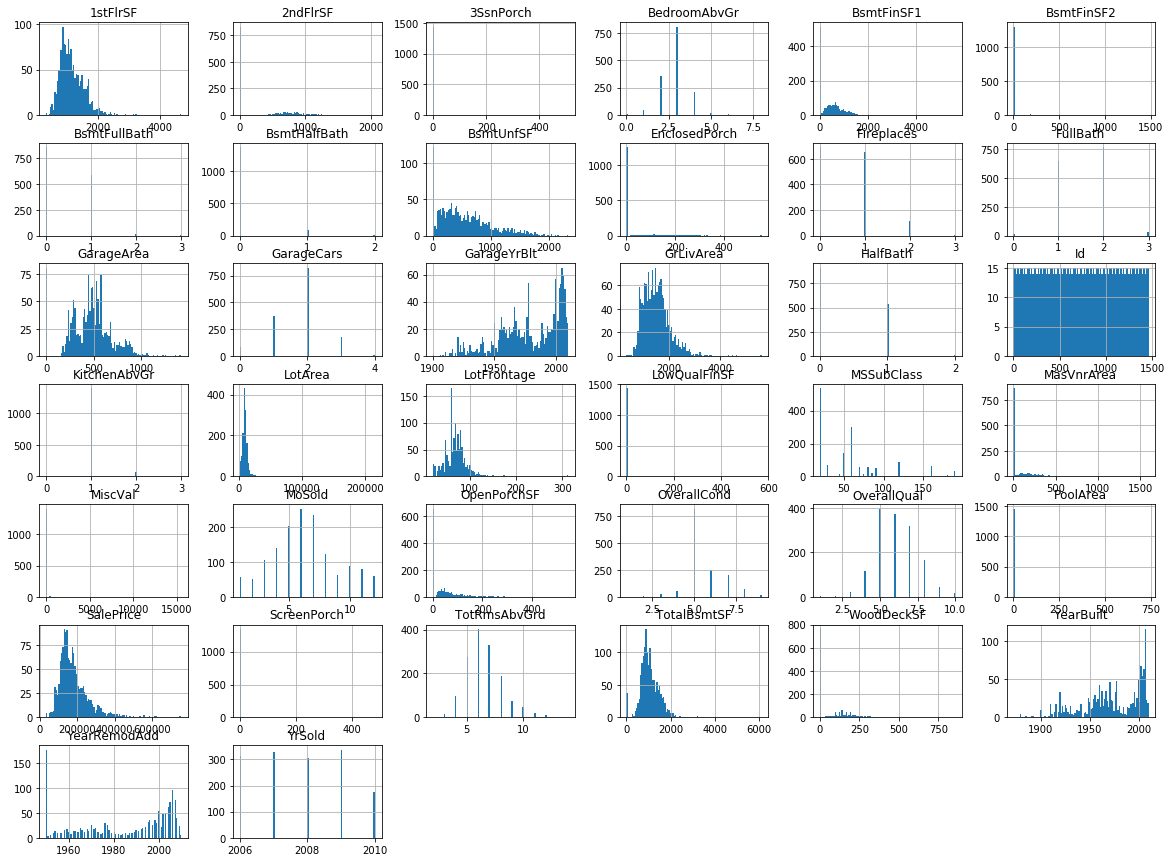

In [6]:
train.hist(bins=100, figsize=(20,15))
plt.show()

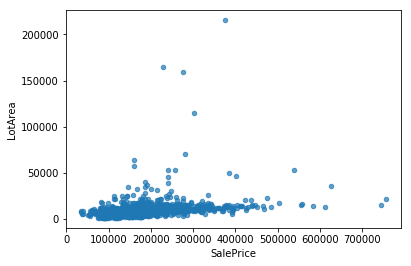

In [7]:
data=train.copy()
data.plot(kind="scatter", x="SalePrice", y="LotArea", alpha=0.7)

In [7]:
corrMatrix=data.corr()
corrMatrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f3a9eb8>,
      dtype=object)

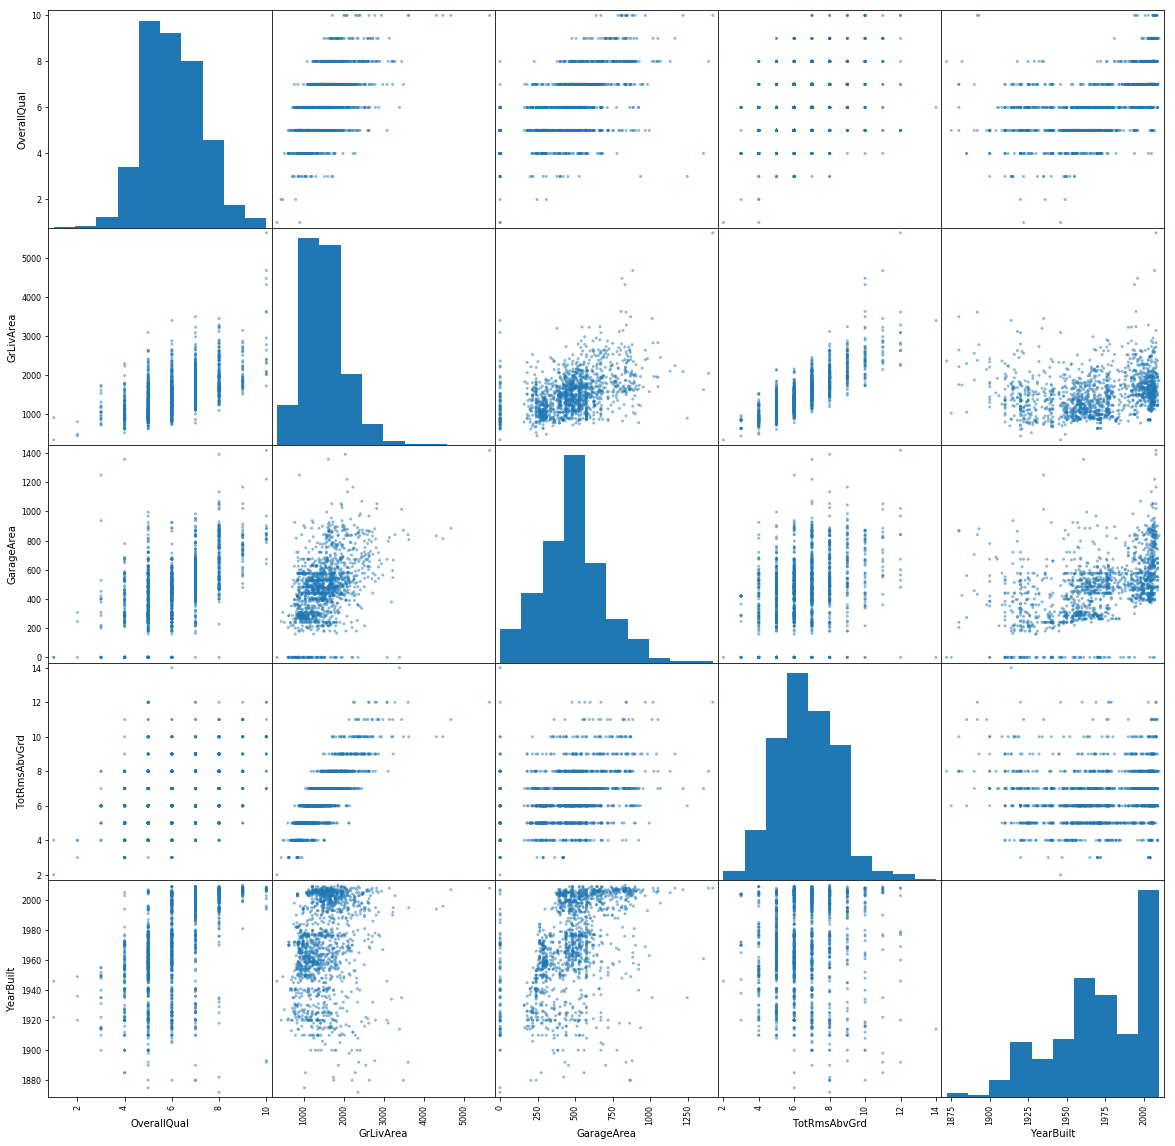

In [8]:
from pandas.plotting import scatter_matrix
atr=['OverallQual','GrLivArea','GarageArea','TotRmsAbvGrd','YearBuilt']
data[atr].head()
scatter_matrix(data[atr], figsize=(20,20))

In [9]:
data["liv_gar"]=data['GrLivArea']/data['GarageArea']
data["liv_gar"].head()
cm=data.corr()
cm['SalePrice'].sort_values(ascending=False)
#corrMatrix=data.corr()
#corrMatrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
liv_gar         -0.019062
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr

In [10]:
data[atr].count()


OverallQual     1460
GrLivArea       1460
GarageArea      1460
TotRmsAbvGrd    1460
YearBuilt       1460
dtype: int64

In [11]:
housing=data[atr].copy()
attributes=list(housing)
print(attributes)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

'''
imputer         -> remove inconsistency
attribs_adder   -> combimes multiple attributes to enhance their correlation on final output
std_scaler      -> scaling of the data for better results
'''
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names=attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
numPipeline= Pipeline([
    ('selector', DataFrameSelector(attributes)),
    ('imputer', Imputer(strategy="median")),
    ('std_scaler', StandardScaler())])
housingData= numPipeline.fit_transform(housing)
housingData[0]

['OverallQual', 'GrLivArea', 'GarageArea', 'TotRmsAbvGrd', 'YearBuilt']


/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([0.65147924, 0.37033344, 0.35100032, 0.91220977, 1.05099379])

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

def get_mae(max_leaf_nodes, predictors_train, predictors_val, targ_train, targ_val):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0) #Model Type
    model.fit(predictors_train, targ_train)
    preds_val = model.predict(predictors_val)
    mae = mean_absolute_error(targ_val, preds_val)
    return(mae)

x= housing.copy()
y= data['SalePrice']
#y= data.pop('SalePrice')
xx= numPipeline.fit_transform(x)
xTrain, xTest, yTrain, yTest = train_test_split(xx, y,random_state = 0)

for MaxLeafNodes in [5,50,500,5000,50000]:
    print(get_mae(MaxLeafNodes, xTrain, xTest, yTrain, yTest))

32550.89711954274
25753.044146902404
27855.537686453576
28472.816438356163
28472.816438356163


In [14]:
from sklearn.model_selection import cross_val_score

def displayScores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Std Deviation: ", scores.std())

def exploreModel(model,X,y):
    model.fit(xx, y)
    scores= cross_val_score(modelDTR, xx, y, scoring="neg_mean_squared_error", cv=10)
    rmse_scores= np.sqrt(-scores)
    displayScores(rmse_scores)

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC, LinearSVC, NuSVC

modelDTR = DecisionTreeRegressor()
exploreModel(modelDTR,xx, y)

modelLR = LinearRegression()
exploreModel(modelLR,xx, y)

modelRFR = RandomForestRegressor()
exploreModel(modelRFR,xx, y)

SVC = SVC()
LSVC = LinearSVC()
NSVC = NuSVC()
exploreModel(SVC,xx, y)
exploreModel(LSVC,xx, y)


Scores:  [45392.24184603 47134.17277923 37441.86701673 54281.13930479
 42767.41556476 40898.98038678 42771.79155401 40600.24236366
 42916.64269223 36825.64517583]
Mean:  43103.01386840547
Std Deviation:  4788.255778458771
Scores:  [45794.61052067 48694.24489913 37274.14391068 54526.76442316
 44134.08438676 39733.66308938 43621.08031855 41180.41683329
 42397.62868781 37777.30249286]
Mean:  43513.39395622779
Std Deviation:  4965.293684514046
Scores:  [45371.30407417 49064.47719403 37436.84165666 45027.28738274
 45626.37838841 37882.68739093 43711.68288937 41818.2785717
 43724.8086847  37910.9947047 ]
Mean:  42757.47409374123
Std Deviation:  3718.6346386065566


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Scores:  [45348.06795042 52119.89453721 36741.12067962 45359.05783033
 43331.74517429 41263.07110779 43726.72211025 39124.45063339
 43613.3122     37581.28692317]
Mean:  42820.87291464656
Std Deviation:  4260.48526057768
Scores:  [55339.52288943 47000.80549026 37446.017441   45686.44134671
 46713.00684675 41040.13187798 42899.03884249 40640.01510963
 42119.25452059 39124.05011758]
Mean:  43800.828448241424
Std Deviation:  4888.0120895710625


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [15]:
xTest= numPipeline.fit_transform(test[atr])
len(xTest)
yTest=modelLR.predict(xTest)
print(len(yTest))

1459


In [20]:
submission=pd.DataFrame({
    "Id": test["Id"],
    "SalePrice": yTest
})
submission.to_csv("housing.csv", index=False)